In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
insurance = pd.read_csv("insurance.csv")

df = insurance.copy() # Create a copy of the dataframe to prevent data loss.
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [50]:
df.isna().sum() # There is no 'na' values in our data.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


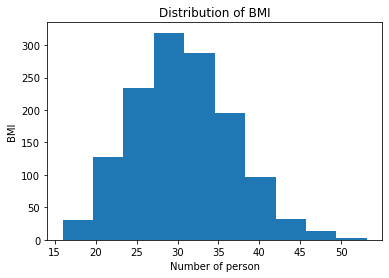

In [78]:
# The distribution of Bmi (Body Mass Index)
plt.hist(df['bmi'])
plt.title("Distribution of BMI")
plt.xlabel("Number of person")
plt.ylabel("BMI")  
plt.show()

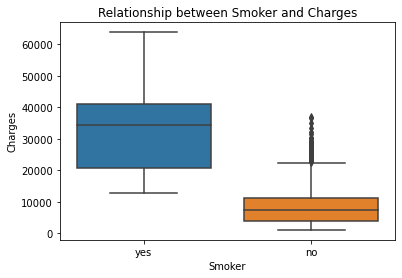

In [80]:
# The relationship between “smoker” and “charges”
plt.figure()
sns.boxplot(x="smoker", y="charges", data= df);
plt.title( "Relationship between Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")  

plt.show()


In [55]:
df["region"].value_counts() # Wanted to check region values.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

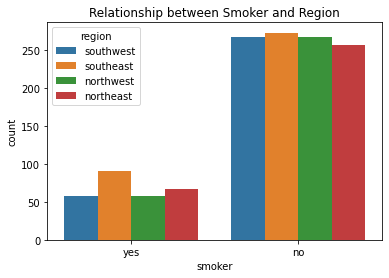

In [81]:
# The relationship between “smoker” and “region”
plt.figure()
sns.countplot(x="smoker", hue="region", data=df)
plt.title("Relationship between Smoker and Region") 

plt.show()



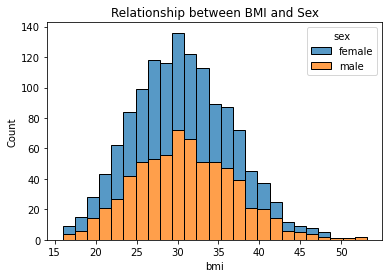

In [57]:
# The relationship between “bmi” and “sex”
plt.figure()

sns.histplot(data=df, x="bmi", hue="sex", multiple="stack")
plt.title("Relationship between BMI and Sex")

plt.show()


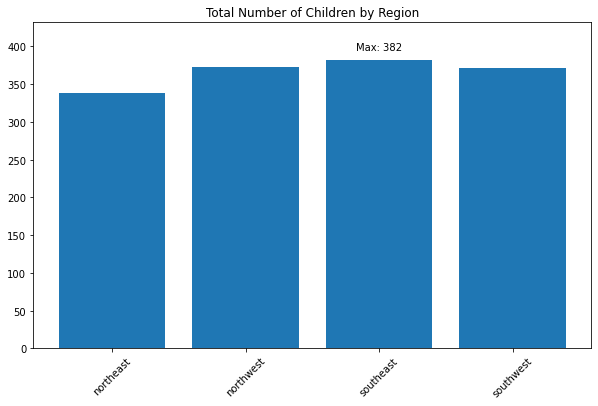

In [58]:
# "region" with the most "children"

region_children = df.groupby("region")["children"].sum() 
# Calculate the total children in each region.


# Find the region with the maximum number of children.
most_children_region = region_children.idxmax()
max_children = region_children.max()

plt.figure(figsize=(10, 6))
plt.bar(region_children.index, region_children.values)
plt.title("Total Number of Children by Region")
plt.xticks(rotation=45)
plt.ylim(0, max_children+50)
plt.annotate(f"Max: {max_children}", (most_children_region, max_children), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

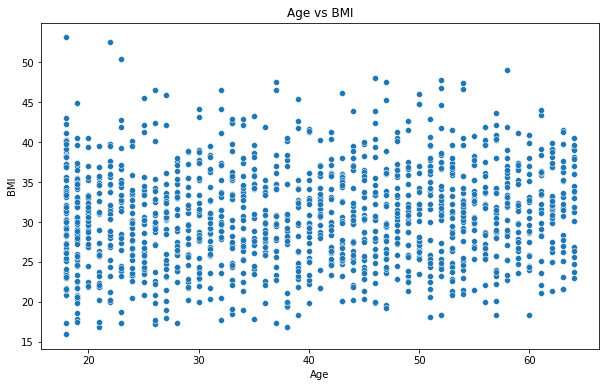

In [59]:
# The relationship between “age” and “bmi”

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["age"], y=df["bmi"])  
plt.title("Age vs BMI") 
plt.xlabel("Age")
plt.ylabel("BMI")  
plt.show() 


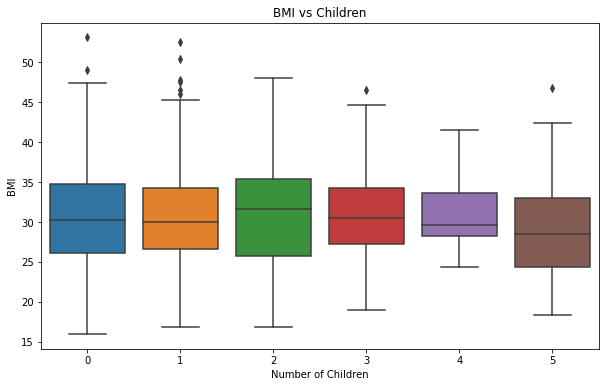

In [60]:
# The relationship between “bmi” and “children”

plt.figure(figsize=(10, 6))
sns.boxplot(x="children", y="bmi" , data = df)
plt.title("BMI vs Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()

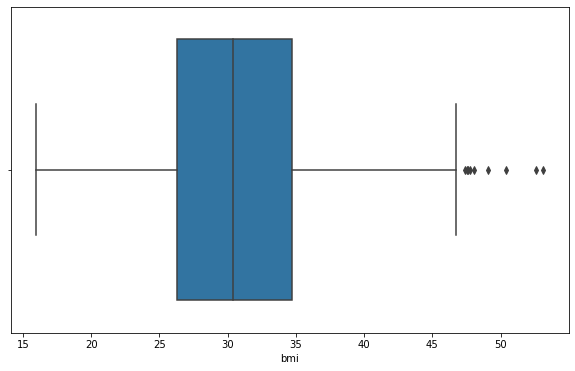

In [82]:
# Finding the outliers of bmi
plt.figure(figsize=(10, 6))
sns.boxplot(x="bmi", data = df);


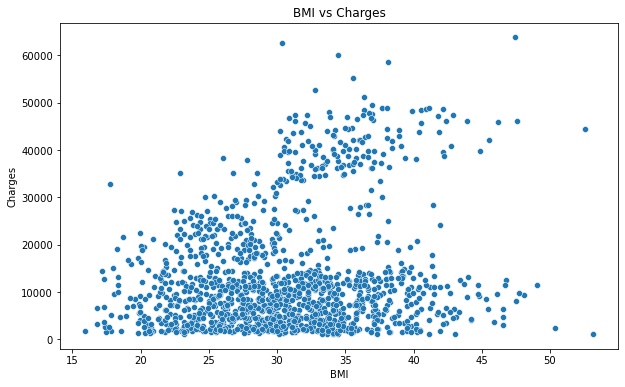

In [62]:
# The relationship between “bmi” and “charges”

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["bmi"], y=df["charges"])
plt.title("BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


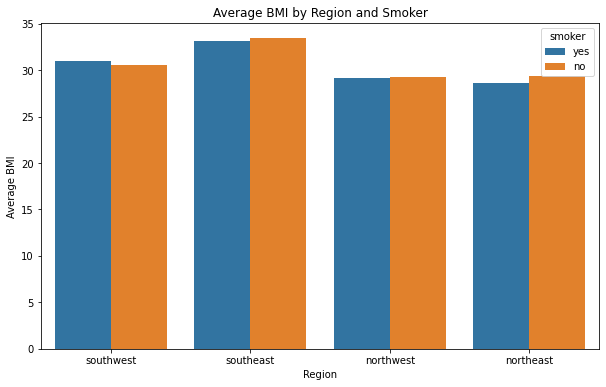

In [63]:
# The relationship between “region”, “smoker” and “bmi”.
plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="bmi", hue="smoker", data=df, ci=None)
plt.title("Average BMI by Region and Smoker")
plt.xlabel("Region")
plt.ylabel("Average BMI")
plt.show()

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [65]:
df_copy = df.copy(deep=True) #Copied because when we encoded some variables, our initial data frame "df" also changes.

label_encoder = LabelEncoder()

# Label encoding for sex and smoker datas.
df_copy["sex_encoded"] = label_encoder.fit_transform(df_copy["sex"])

df_copy["smoker_encoded"] = label_encoder.fit_transform(df_copy["smoker"])

df_copy.drop(["sex", "smoker"], axis=1, inplace=True)

# One-hot encoding
region_encoded = pd.get_dummies(df_copy["region"], prefix="region", drop_first=False)

df_copy = pd.concat([df_copy, region_encoded], axis=1)

df_copy.drop("region", axis=1, inplace=True)

df_copy

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


In [66]:
X = df_copy.loc [:, ["age", "sex_encoded", "bmi", "children",
 "smoker_encoded", "region_northeast", 
"region_northwest", "region_southeast", "region_southwest"]]

y= df_copy.loc[:, "charges"] # We want to predict charges.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Split our dataset into train and test sets.

In [69]:
from sklearn.preprocessing import StandardScaler

# Standard Scaling
scaler = StandardScaler()

columns_to_scale = ["age", "sex_encoded"]

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [72]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# These are our regression models.
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Support Vector Regressor", SVR())
]

# Evaluate each model using cross-validation and calculate RMSE.
scores = [
    (name, np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))),
     np.std(np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))))
    for name, model in models
]

# Sort models by mean RMSE.
sorted_scores = sorted(scores, key=lambda x: x[1])

for name, mean_rmse, std_rmse in sorted_scores:
    print(f"{name}: Mean RMSE = {mean_rmse:.2f} (Std = {std_rmse:.2f})")

# Choose the best performing model.
best_model = min(sorted_scores, key=lambda x: x[1])[0]
print(f"The best performing model is: {best_model}")


Random Forest Regressor: Mean RMSE = 4873.93 (Std = 648.59)
Linear Regression: Mean RMSE = 6137.64 (Std = 628.39)
Decision Tree Regressor: Mean RMSE = 6202.18 (Std = 195.44)
Support Vector Regressor: Mean RMSE = 12655.75 (Std = 984.25)
The best performing model is: Random Forest Regressor


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for the Random Forest Regressor.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


rf_regressor = RandomForestRegressor()

# Create a GridSearchCV instance with the Random Forest Regressor and parameter grid.
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)


grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", np.sqrt(-grid_search.best_score_))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, 

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make prediction.
y_pred = grid_search.predict(X_test)

# Calculate MSE.
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE.
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared.
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 20182327.195328783
Mean Absolute Error: 2610.6651634976274
R-squared: 0.8643542232612781
